<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/practice_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data
df = pd.read_csv('data01_iris.csv')
X = df[ ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'] ]

# **Kmeans**

In [ ]:
# kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)
km.labels_
pd.crosstab(km.labels_,df['Species'])
#X.plot.scatter('Sepal.Length','Petal.Width',c=hc.labels_,colormap='viridis')

Species,setosa,versicolor,virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [ ]:
# clustering with selected variables
km.fit(X.iloc[:,[0,1]])
pd.crosstab(km.labels_,df['Species'])
# what is the best subset for the clustering?

# pca & clustering
from sklearn.decomposition import PCA
pca = PCA()
xtrans = pca.fit_transform(X)
km = KMeans(n_clusters=3,random_state=0)
km.fit(xtrans[:,(0,1)])
pd.crosstab(km.labels_,df['Species'])

# scaling, pca, clustering
from sklearn.preprocessing import scale
xscaled = scale(X,axis=0,with_mean=True,with_std=True)
km.fit(xscaled)
pd.crosstab(km.labels_,df['Species'])

x = pca.fit_transform(xscaled)
km.fit(x[:,(0,1)])
pd.crosstab(km.labels_,df['Species'])

Species,setosa,versicolor,virginica
row_0,,,
0,50,0,0
1,0,39,14
2,0,11,36


# **Gaussian Mixture**

In [ ]:
# gaussian mixture
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,random_state=0)
gm.fit(X)
gm.predict(X)
pd.crosstab(gm.predict(X),df['Species'])
#X.plot.scatter('Sepal.Length','Petal.Width',c=hc.labels_,colormap='viridis')

# scaling : Gaussian Mixture는 scaling을 하던지 안하던지 큰 상관 x.
from sklearn.preprocessing import scale
gm = GaussianMixture(n_components=3,random_state=0)
xscaled = scale(X,axis=0,with_mean=True,with_std=True)
gm.fit(xscaled)
pd.crosstab(gm.predict(xscaled),df['Species'])

# scaled & clustering
from sklearn.preprocessing import scale
xscaled = scale(X,axis=0,with_mean=True,with_std=True)
from sklearn.decomposition import PCA
pca = PCA()
x = pca.fit_transform(xscaled)
gm = GaussianMixture(n_components=3,random_state=0)
gm.fit(x[:,(0,1,2)])
pd.crosstab(gm.predict(x[:,(0,1,2)]),df['Species'])

Species,setosa,versicolor,virginica
row_0,,,
0,50,0,0
1,0,44,0
2,0,6,50


# **Hierachical clustering**

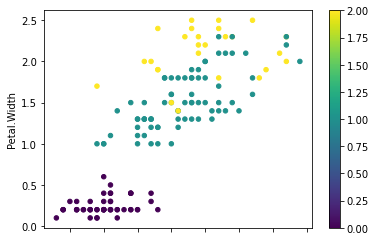

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X)
pd.crosstab(hc.labels_,df['Species'])
hc.children_

# different options
hc = AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')
hc.fit(X)
pd.crosstab(hc.labels_,df['Species'])
X.plot.scatter('Sepal.Length','Petal.Width',c=hc.labels_,colormap='viridis')